In [1]:
#importing libraries...
import pandas as pd
import numpy as np
import csv 
import random 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
leaf_dataSet = pd.read_csv("leaf.csv",names=['Class','Specimen No', 'Eccentricity','Aspect Ratio','Elongation',' Solidity','Stochastic Convexity','Isoperimetric Factor'
                       , 'Maximal Indentation Depth', ' Lobedness', 'Average Intensity', 'Average Contrast','Smoothness', 'Third moment','Uniformity',' Entropy'])
leaf_dataSet

,Class,Specimen No,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


In [5]:
leaf_dataSet.describe()

,Class,Specimen No,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,18.544118,6.282353,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.051346,0.124535,0.017670,0.005928,0.000387,1.162630
std,11.152514,3.462779,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.035965,0.051860,0.013755,0.005294,0.000431,0.584854
min,1.000000,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,9.000000,3.000000,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,15.000000,6.000000,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,29.000000,9.000000,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,36.000000,16.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


In [6]:
#dividing cloumns
X = leaf_dataSet.iloc[:, 0] #class column is our target
Y = leaf_dataSet.drop(columns=['Class','Specimen No']) #removing class and specimen no from Y data set

# 1.training size 75% and test size 25 % 

In [7]:
x_data_train1, x_data_test1, y_data_train1, y_data_test1 = train_test_split(X,Y,test_size=0.25 ) # 0.25 == 25% test size
print('X-train =',x_data_train1.shape)
print('X-test =',x_data_test1.shape)
print('Y-train =',y_data_train1.shape)
print('Y-test =',y_data_test1.shape)

X-train = (255,)
X-test = (85,)
Y-train = (255, 14)
Y-test = (85, 14)


In [8]:
#importing libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import metrics

# First checking with non normalized data on 25% test size

In [9]:
#k=3
k3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
k3.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_pred1 = k3.predict(y_data_test1)
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_pred1)*100)


Accuracy: 56.470588235294116


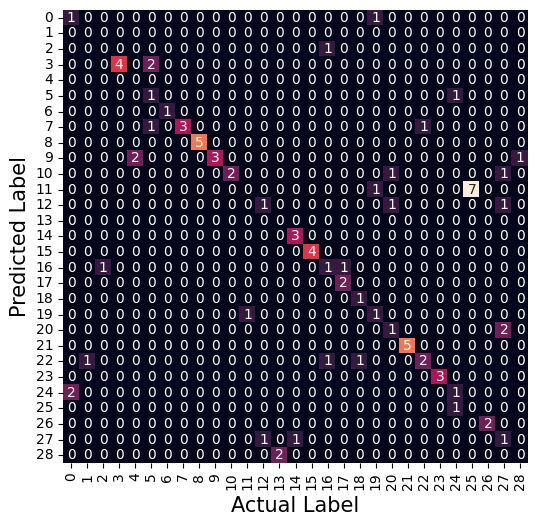

In [10]:
matrix = confusion_matrix(y_pred1,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [11]:
#k = 5
k5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
k5.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_pred2 = k5.predict(y_data_test1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_pred2)*100)


Accuracy: 58.82352941176471


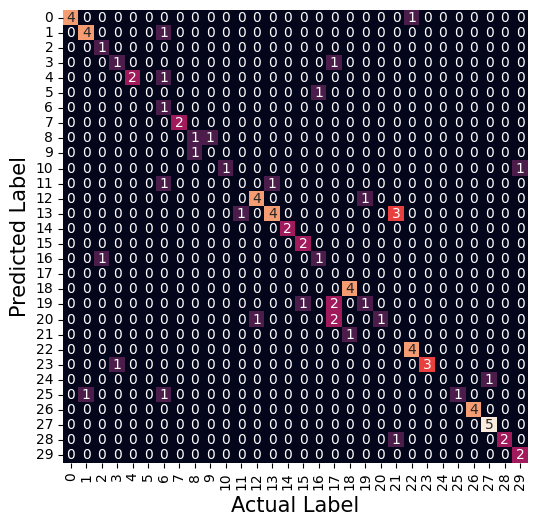

In [74]:
matrix = confusion_matrix(y_pred2,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [13]:
#k = 7
k7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
k7.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_pred3 = k7.predict(y_data_test1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_pred3)*100)


Accuracy: 54.11764705882353


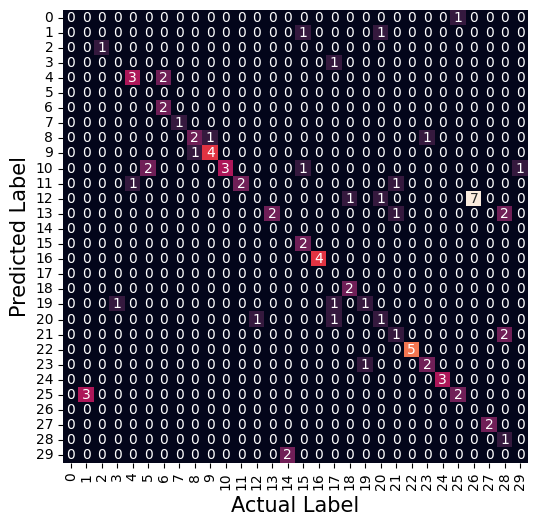

In [14]:
matrix = confusion_matrix(y_pred3,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# Now normalized data 

In [15]:
scaler = StandardScaler() #StandardScaler removes the mean and scales each feature/variable to unit variance
scaler.fit(y_data_train1)

y_data_train1 = scaler.transform(y_data_train1)
y_data_test1 = scaler.transform(y_data_test1)

y_data_train1 = Normalizer().fit_transform(y_data_train1)
y_data_test1 = Normalizer().fit(y_data_train1).transform(y_data_test1)

In [16]:
#after normalizing data checking k=3 value 
kN3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
kN3.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_Normalized_1 = kN3.predict(y_data_test1)
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_Normalized_1)*100)

Accuracy: 64.70588235294117


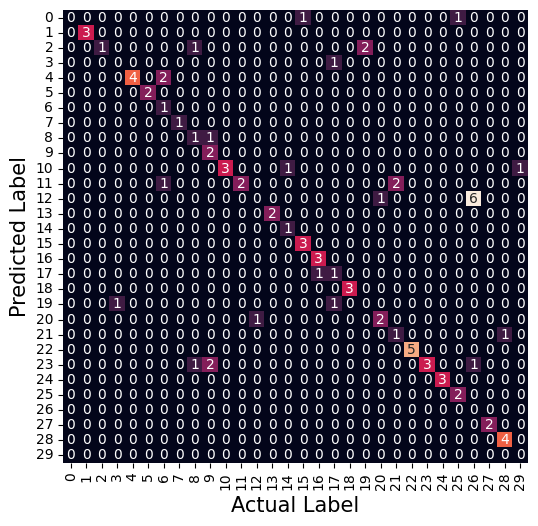

In [17]:
matrix = confusion_matrix(y_Normalized_1,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [18]:
#after normalizing data checking k=5 value
kN5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
kN5.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_Normalized_2 = kN5.predict(y_data_test1)
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_Normalized_2)*100)

Accuracy: 65.88235294117646


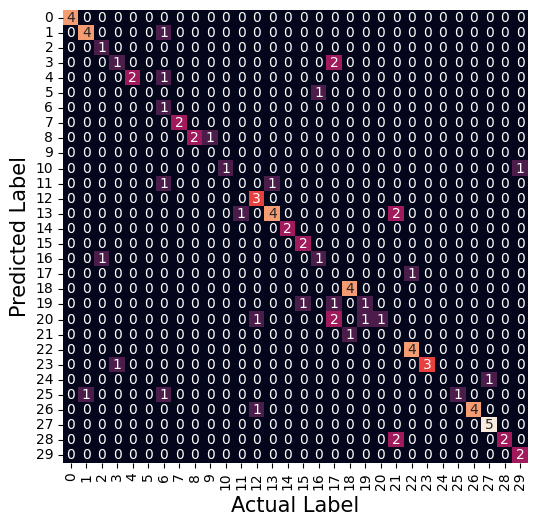

In [82]:
matrix = confusion_matrix(y_Normalized_2,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [20]:
#after normalizing data checking k=7 value
kN7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
kN7.fit(y_data_train1, x_data_train1)
#for finding accuracy
y_Normalized_3 = kN7.predict(y_data_test1)
print("Accuracy:",metrics.accuracy_score(x_data_test1, y_Normalized_3)*100)

Accuracy: 62.35294117647059


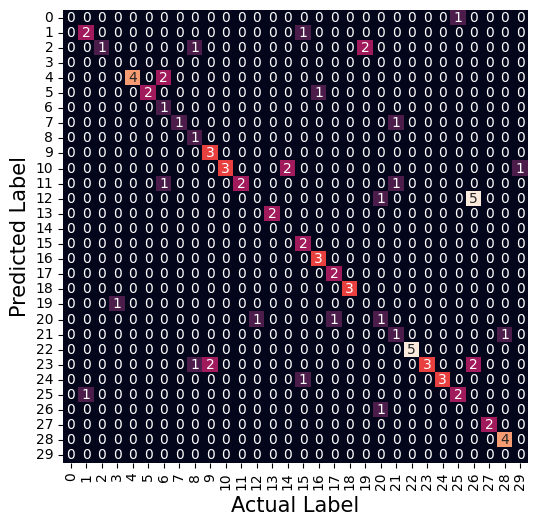

In [21]:
matrix = confusion_matrix(y_Normalized_3,x_data_test1)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# checking with 50% trainig size & 50% test size..

In [22]:
x_data_train2, x_data_test2, y_data_train2, y_data_test2 = train_test_split(X,Y,test_size=0.50 )

In [23]:
print('X-train-2 =',x_data_train2.shape)
print('X-test-2 =' ,x_data_test2.shape)
print('Y-train-2 =',y_data_train2.shape)
print('Y-test-2 =',y_data_test2.shape)

X-train-2 = (170,)
X-test-2 = (170,)
Y-train-2 = (170, 14)
Y-test-2 = (170, 14)


# Non-normalized data 

In [24]:
k3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
k3.fit(y_data_train2, x_data_train2)
y_prediction_1 = k3.predict(y_data_test2)
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction_1)*100)

Accuracy: 54.11764705882353


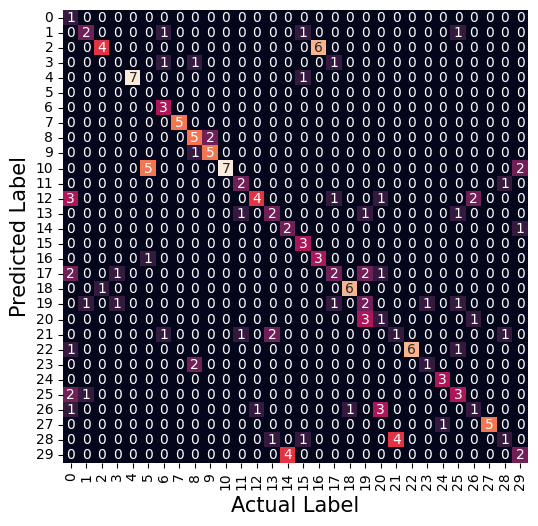

In [90]:
matrix = confusion_matrix(y_prediction_1,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [25]:
k5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
k5.fit(y_data_train2, x_data_train2)
y_prediction_2 = k5.predict(y_data_test2)
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction_2)*100)

Accuracy: 52.94117647058824


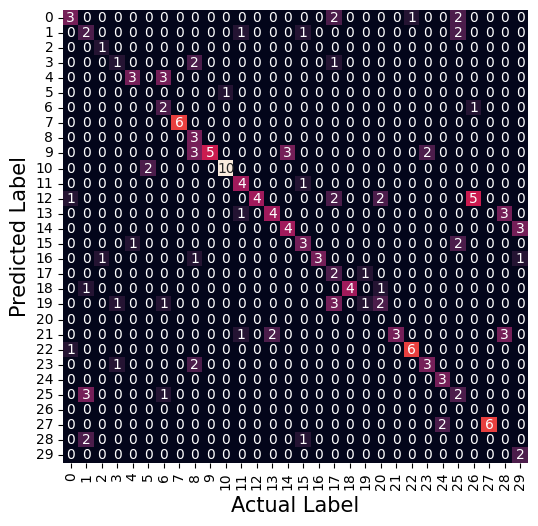

In [26]:
matrix = confusion_matrix(y_prediction_2,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [27]:
k7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
k7.fit(y_data_train2, x_data_train2)
y_prediction_3 = k7.predict(y_data_test2)
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction_3)*100)

Accuracy: 51.76470588235295


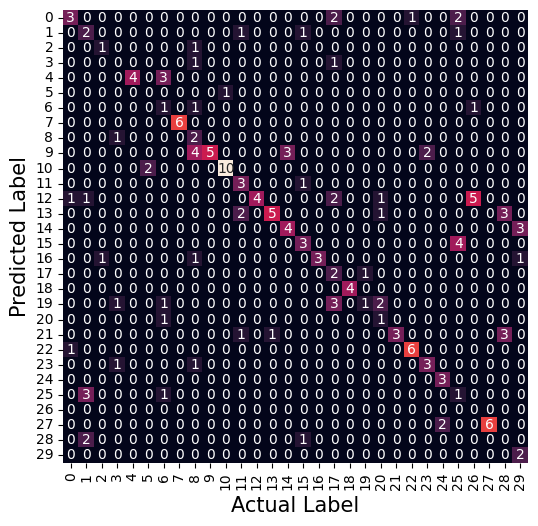

In [28]:
matrix = confusion_matrix(y_prediction_3,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# Normalizing data 

In [29]:
scaler = StandardScaler()
scaler.fit(y_data_train2)

y_data_train2 = scaler.transform(y_data_train2)
y_data_test2 = scaler.transform(y_data_test2)

y_data_train2 = Normalizer().fit_transform(y_data_train2)
y_data_test2 = Normalizer().fit(y_data_train2).transform(y_data_test2)

In [30]:
kN3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
kN3.fit(y_data_train2, x_data_train2)
y_prediction1 = kN3.predict(y_data_test2)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction1)*100)

Accuracy: 62.35294117647059


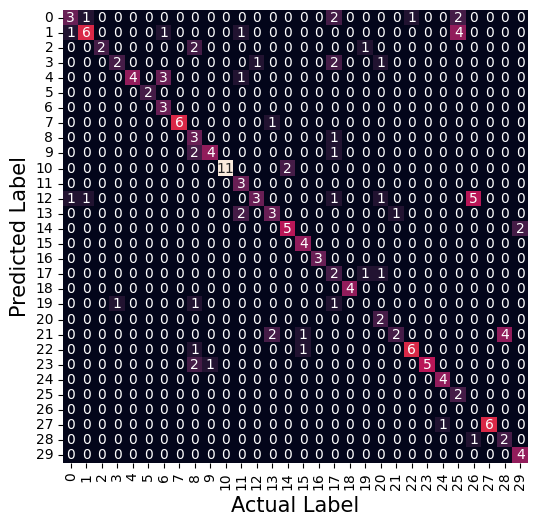

In [31]:
matrix = confusion_matrix(y_prediction1,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [32]:
kN5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
kN5.fit(y_data_train2, x_data_train2)
y_prediction2 = kN5.predict(y_data_test2)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction2)*100)

Accuracy: 59.411764705882355


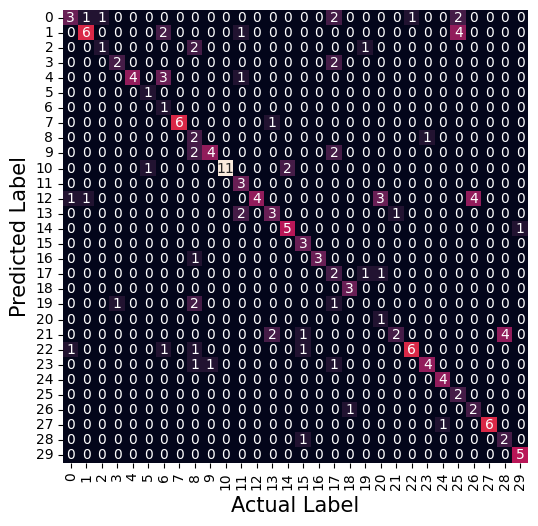

In [33]:
matrix = confusion_matrix(y_prediction2,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [34]:
kN7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
kN7.fit(y_data_train2, x_data_train2)
y_prediction3 = kN7.predict(y_data_test2)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test2, y_prediction3)*100)

Accuracy: 59.411764705882355


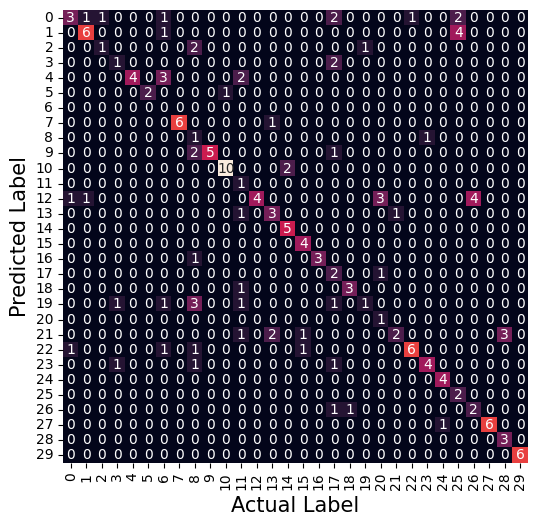

In [35]:
matrix = confusion_matrix(y_prediction3,x_data_test2)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# 3. Train size = 0.66 & Test size =0.33

In [36]:
x_data_train3, x_data_test3, y_data_train3, y_data_test3 = train_test_split(X,Y,test_size=0.33 ) 

In [37]:
print(x_data_train3.shape)
print(x_data_test3.shape)
print(y_data_train3.shape)
print(y_data_test3.shape)

(227,)
(113,)
(227, 14)
(113, 14)


# Non-normalized data

In [38]:
k3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
k3.fit(y_data_train3, x_data_train3)
y_prediction_1 = k3.predict(y_data_test3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_prediction_1)*100)

Accuracy: 61.94690265486725


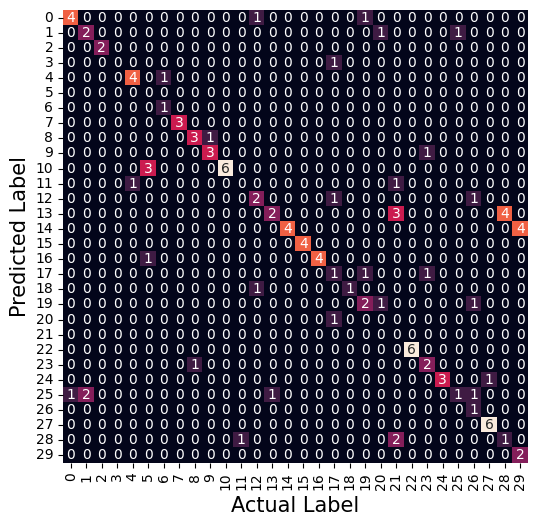

In [39]:
matrix = confusion_matrix(y_prediction_1,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [40]:
k5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
k5.fit(y_data_train3, x_data_train3)
y_prediction_2 = k5.predict(y_data_test3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_prediction_2)*100)

Accuracy: 58.4070796460177


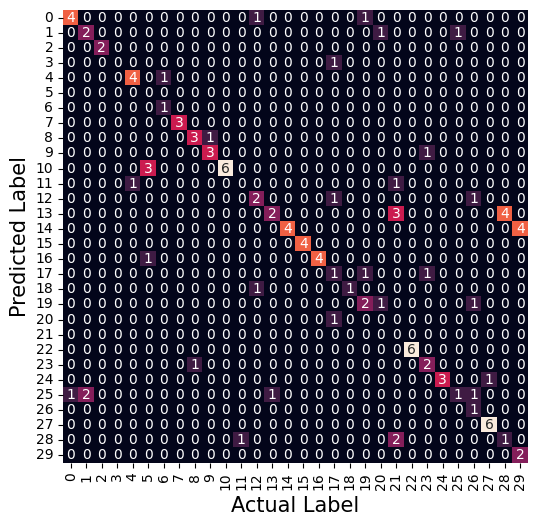

In [41]:
matrix = confusion_matrix(y_prediction_1,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [42]:
k7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
k7.fit(y_data_train3, x_data_train3)
y_prediction_3 = k7.predict(y_data_test3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_prediction_3)*100)

Accuracy: 57.52212389380531


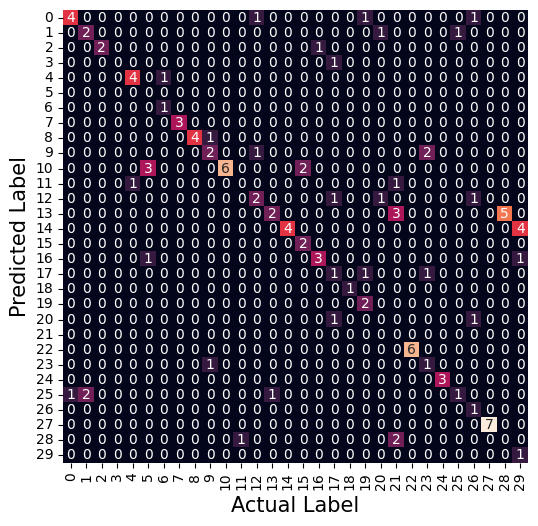

In [43]:
matrix = confusion_matrix(y_prediction_3,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# Normalized data

In [44]:
scaler = StandardScaler()
scaler.fit(y_data_train3)

y_data_train3 = scaler.transform(y_data_train3)
y_data_test3 = scaler.transform(y_data_test3)

y_data_train3 = Normalizer().fit_transform(y_data_train3)
y_data_test3 = Normalizer().fit(y_data_train3).transform(y_data_test3)

In [45]:
kN3 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
kN3.fit(y_data_train3, x_data_train3)
y_pred_1 = kN3.predict(y_data_test3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_pred_1)*100)

Accuracy: 77.87610619469027


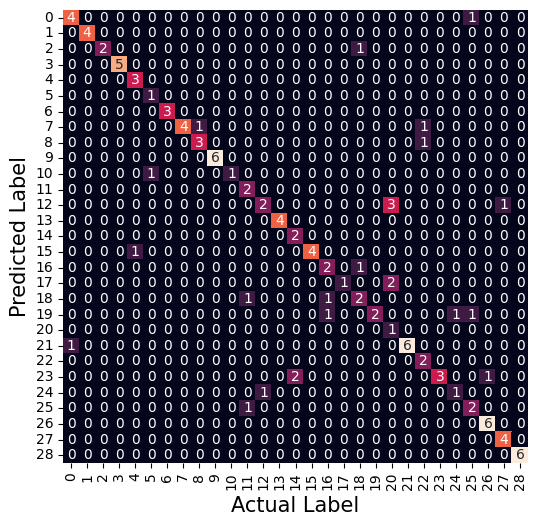

In [46]:
matrix = confusion_matrix(y_pred_1,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [47]:
kN5 = KNeighborsClassifier(n_neighbors = 5, weights='distance')
kN5.fit(y_data_train3, x_data_train3)
y_pred_2 = kN5.predict(y_data_test3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_pred_2)*100)

Accuracy: 76.10619469026548


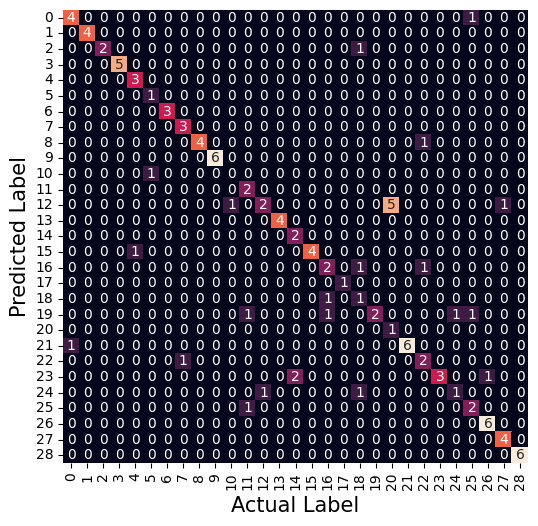

In [48]:
matrix = confusion_matrix(y_pred_2,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

In [49]:
kN7 = KNeighborsClassifier(n_neighbors = 7, weights='distance')
kN7.fit(y_data_train3, x_data_train3)
y_pred_3 = kN7.predict(y_data_test3)
print("Accuracy:",metrics.accuracy_score(x_data_test3, y_pred_3)*100)

Accuracy: 72.56637168141593


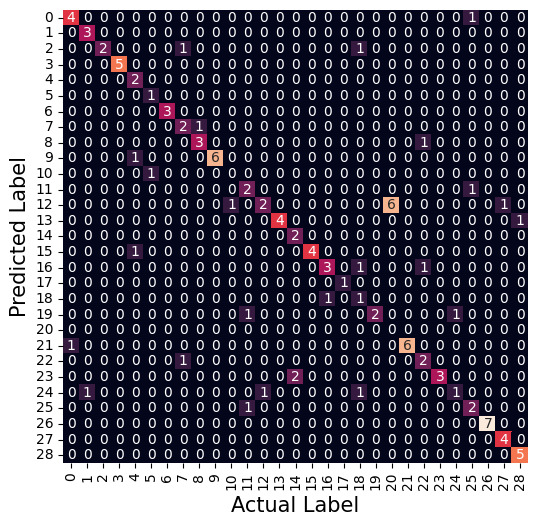

In [50]:
matrix = confusion_matrix(y_pred_3,x_data_test3)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True,  cbar=False, fmt='d' )
plt.xlabel('Actual Label', fontsize=15)
plt.ylabel('Predicted Label',fontsize=15);

# Conclusion:
The best 3 Accuracy Scores were obtained when data was splitted into 75% train and 25% test and the data was normalized..